In [44]:
%matplotlib notebook

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import psana
from tqdm import tqdm
from utilities import *

In [46]:
expname = 'xppl1001021'
run = 69
with h5py.File('/sdf/data/lcls/ds/xpp/{}/hdf5/smalldata/{}_Run{:04d}.h5'.format(expname, expname, run)) as f:
    print (f.keys())
    mask = f['UserDataCfg/epix_alc1/mask'][()] #this is the general mask 
    droplet_mask = f['UserDataCfg/epix_alc1/ragged_droplet__ragged_droplet_droplet_mask'][()] # we added a droplet mask 
    photons_j = f['epix_alc1/ragged_droplet_photon_j'][()]
    photons_i = f['epix_alc1/ragged_droplet_photon_i'][()]
    ipm2 = f['ipm2/sum'][()]

<KeysViewHDF5 ['Sums', 'UserDataCfg', 'ai', 'damage', 'diode2', 'diodeU', 'ebeam', 'epics', 'epicsAll', 'epix_alc1', 'epix_alc1_env', 'epix_alc2', 'epix_alc2_env', 'epix_alc3', 'epix_alc3_env', 'epix_alc4', 'epix_alc4_env', 'event_time', 'evr', 'feeBld', 'fiducials', 'ipm2', 'ipm_hx2', 'lightStatus', 'lombpm', 'lomdiode', 'scan', 'tt']>


In [47]:
# np.save("/sdf/data/lcls/ds/xpp/xppl1001021/results/shared/mask_epix5.npy", mask*droplet_mask)

<IPython.core.display.Javascript object>


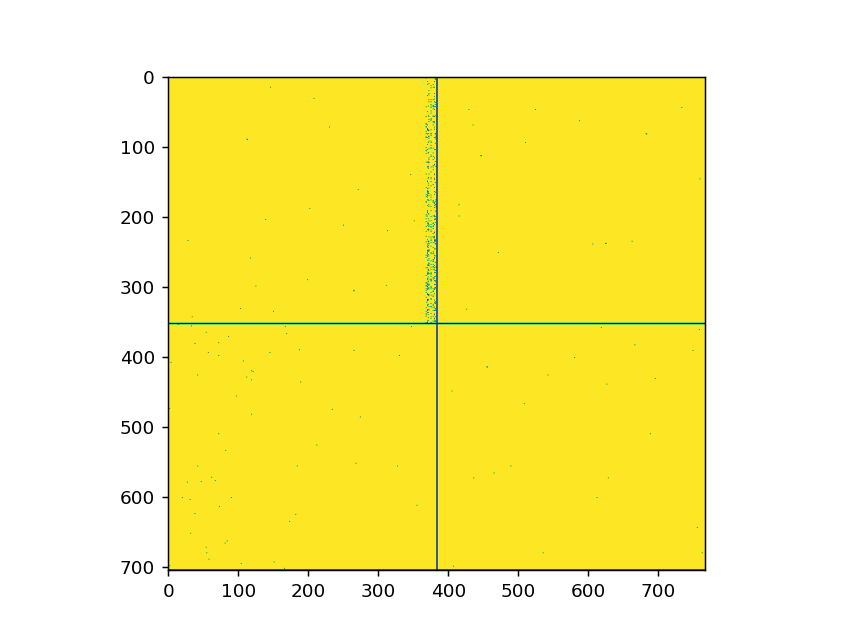

In [48]:
plt.figure()
plt.imshow(mask*droplet_mask) # this is droplet mask

In [49]:
shape = mask.shape
nframe = len(photons_i)
nframe = 1000
imgs_reconstruct = np.zeros(np.r_[nframe, shape])
for i in tqdm(range(nframe)):
    imgs_reconstruct[i] = reconstruct_img(photons_i[i], photons_j[i], shape)

100%|██████████| 1000/1000 [00:04<00:00, 201.84it/s]


<IPython.core.display.Javascript object>


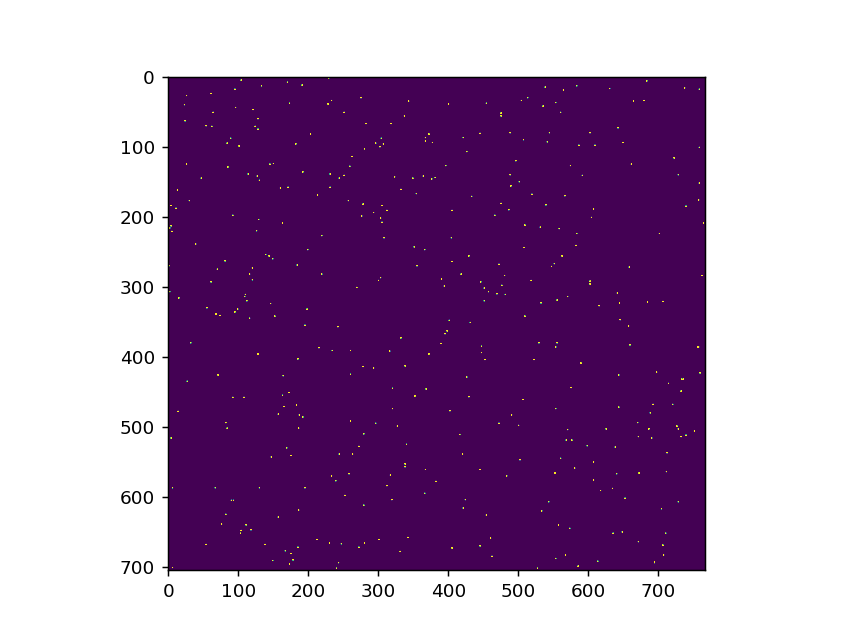

In [50]:
plt.figure()
plt.imshow(imgs_reconstruct.mean(axis = 0), vmin = 0, vmax = 1e-4)

<IPython.core.display.Javascript object>


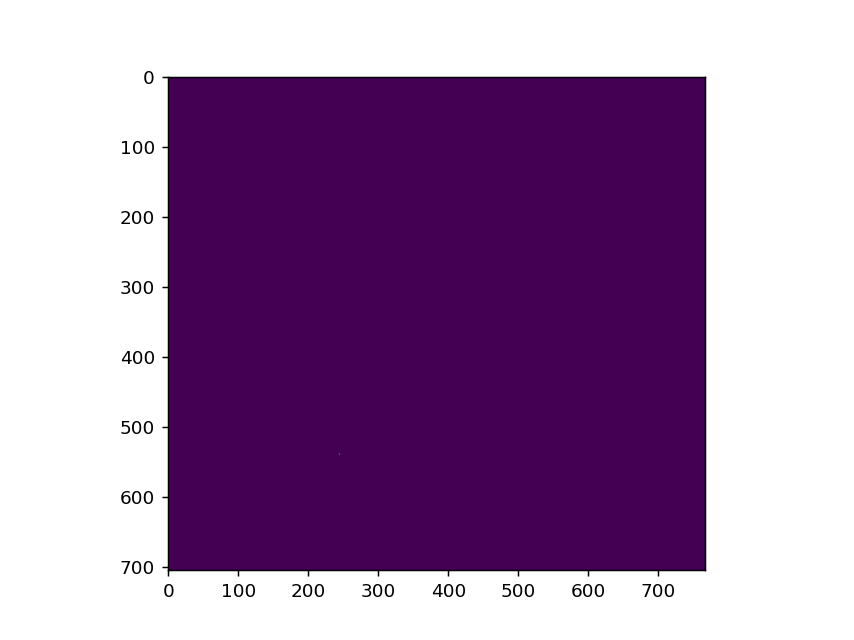

In [51]:
ROI = np.zeros_like(mask)
ROI[460:560, 200:260] = 1
ROI = ROI*mask
plt.figure()
plt.imshow(imgs_reconstruct.mean(axis = 0)* ROI)

In [52]:
nframe = len(photons_i)
ps = np.zeros((nframe, 12))

for i in tqdm(range(nframe)):
    ps[i] = np.squeeze(getProb_img(photons_i[i], photons_j[i], mask = ROI))

100%|██████████| 1577/1577 [00:05<00:00, 275.26it/s]


<IPython.core.display.Javascript object>


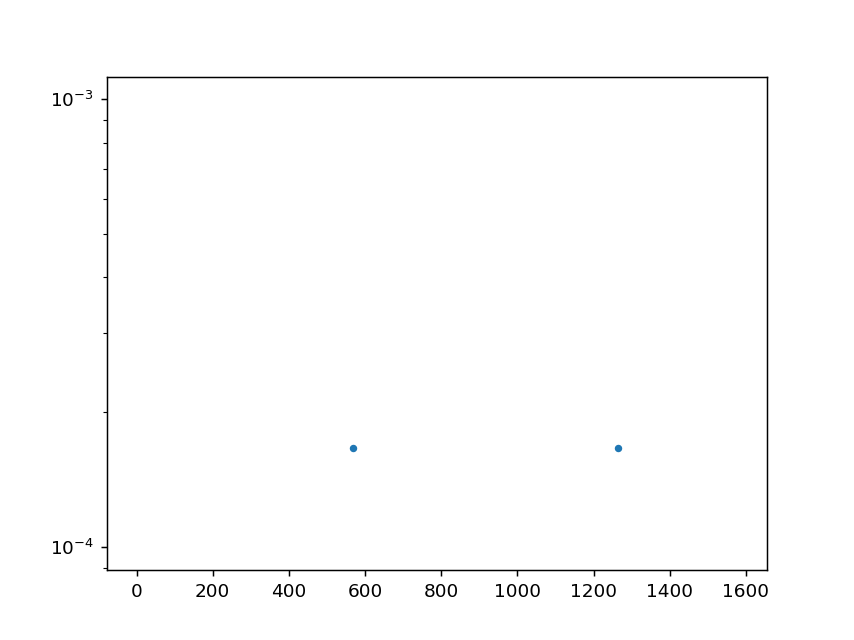

In [53]:
plt.figure()
plt.plot(ps[:, -1],'.')
plt.yscale('log')

In [56]:
ps[:, -1].mean()

2.1144228376273384e-07

In [57]:
np.nanmean(ipm2)

12452.67454026633